In [17]:
import json
from pathlib import Path 
dep_graph = json.loads(Path('../models/spark/indexes/latest/dep-graph.json').read_text())
len(dep_graph)

5421

In [24]:
targets = ['org.apache.spark.sql.Dataset']

from ptesting import depgraph
sg, _ = depgraph.select_subgraph(targets, dep_graph, depth=5)
len(sg)

330

In [20]:
node_id_to_name = {}
name_to_node_id = {}
edge_list = []
next_id = 0

for src, dsts in sg.items():
    if src not in name_to_node_id:
        name_to_node_id[src] = next_id
        node_id_to_name[next_id] = src
        next_id += 1
        
    src_id = name_to_node_id[src]
    for dst in dsts:
        if dst not in name_to_node_id:
            name_to_node_id[dst] = next_id
            node_id_to_name[next_id] = dst
            next_id += 1

        edge_list.append((src_id, name_to_node_id[dst]))
        
len(edge_list)

5107

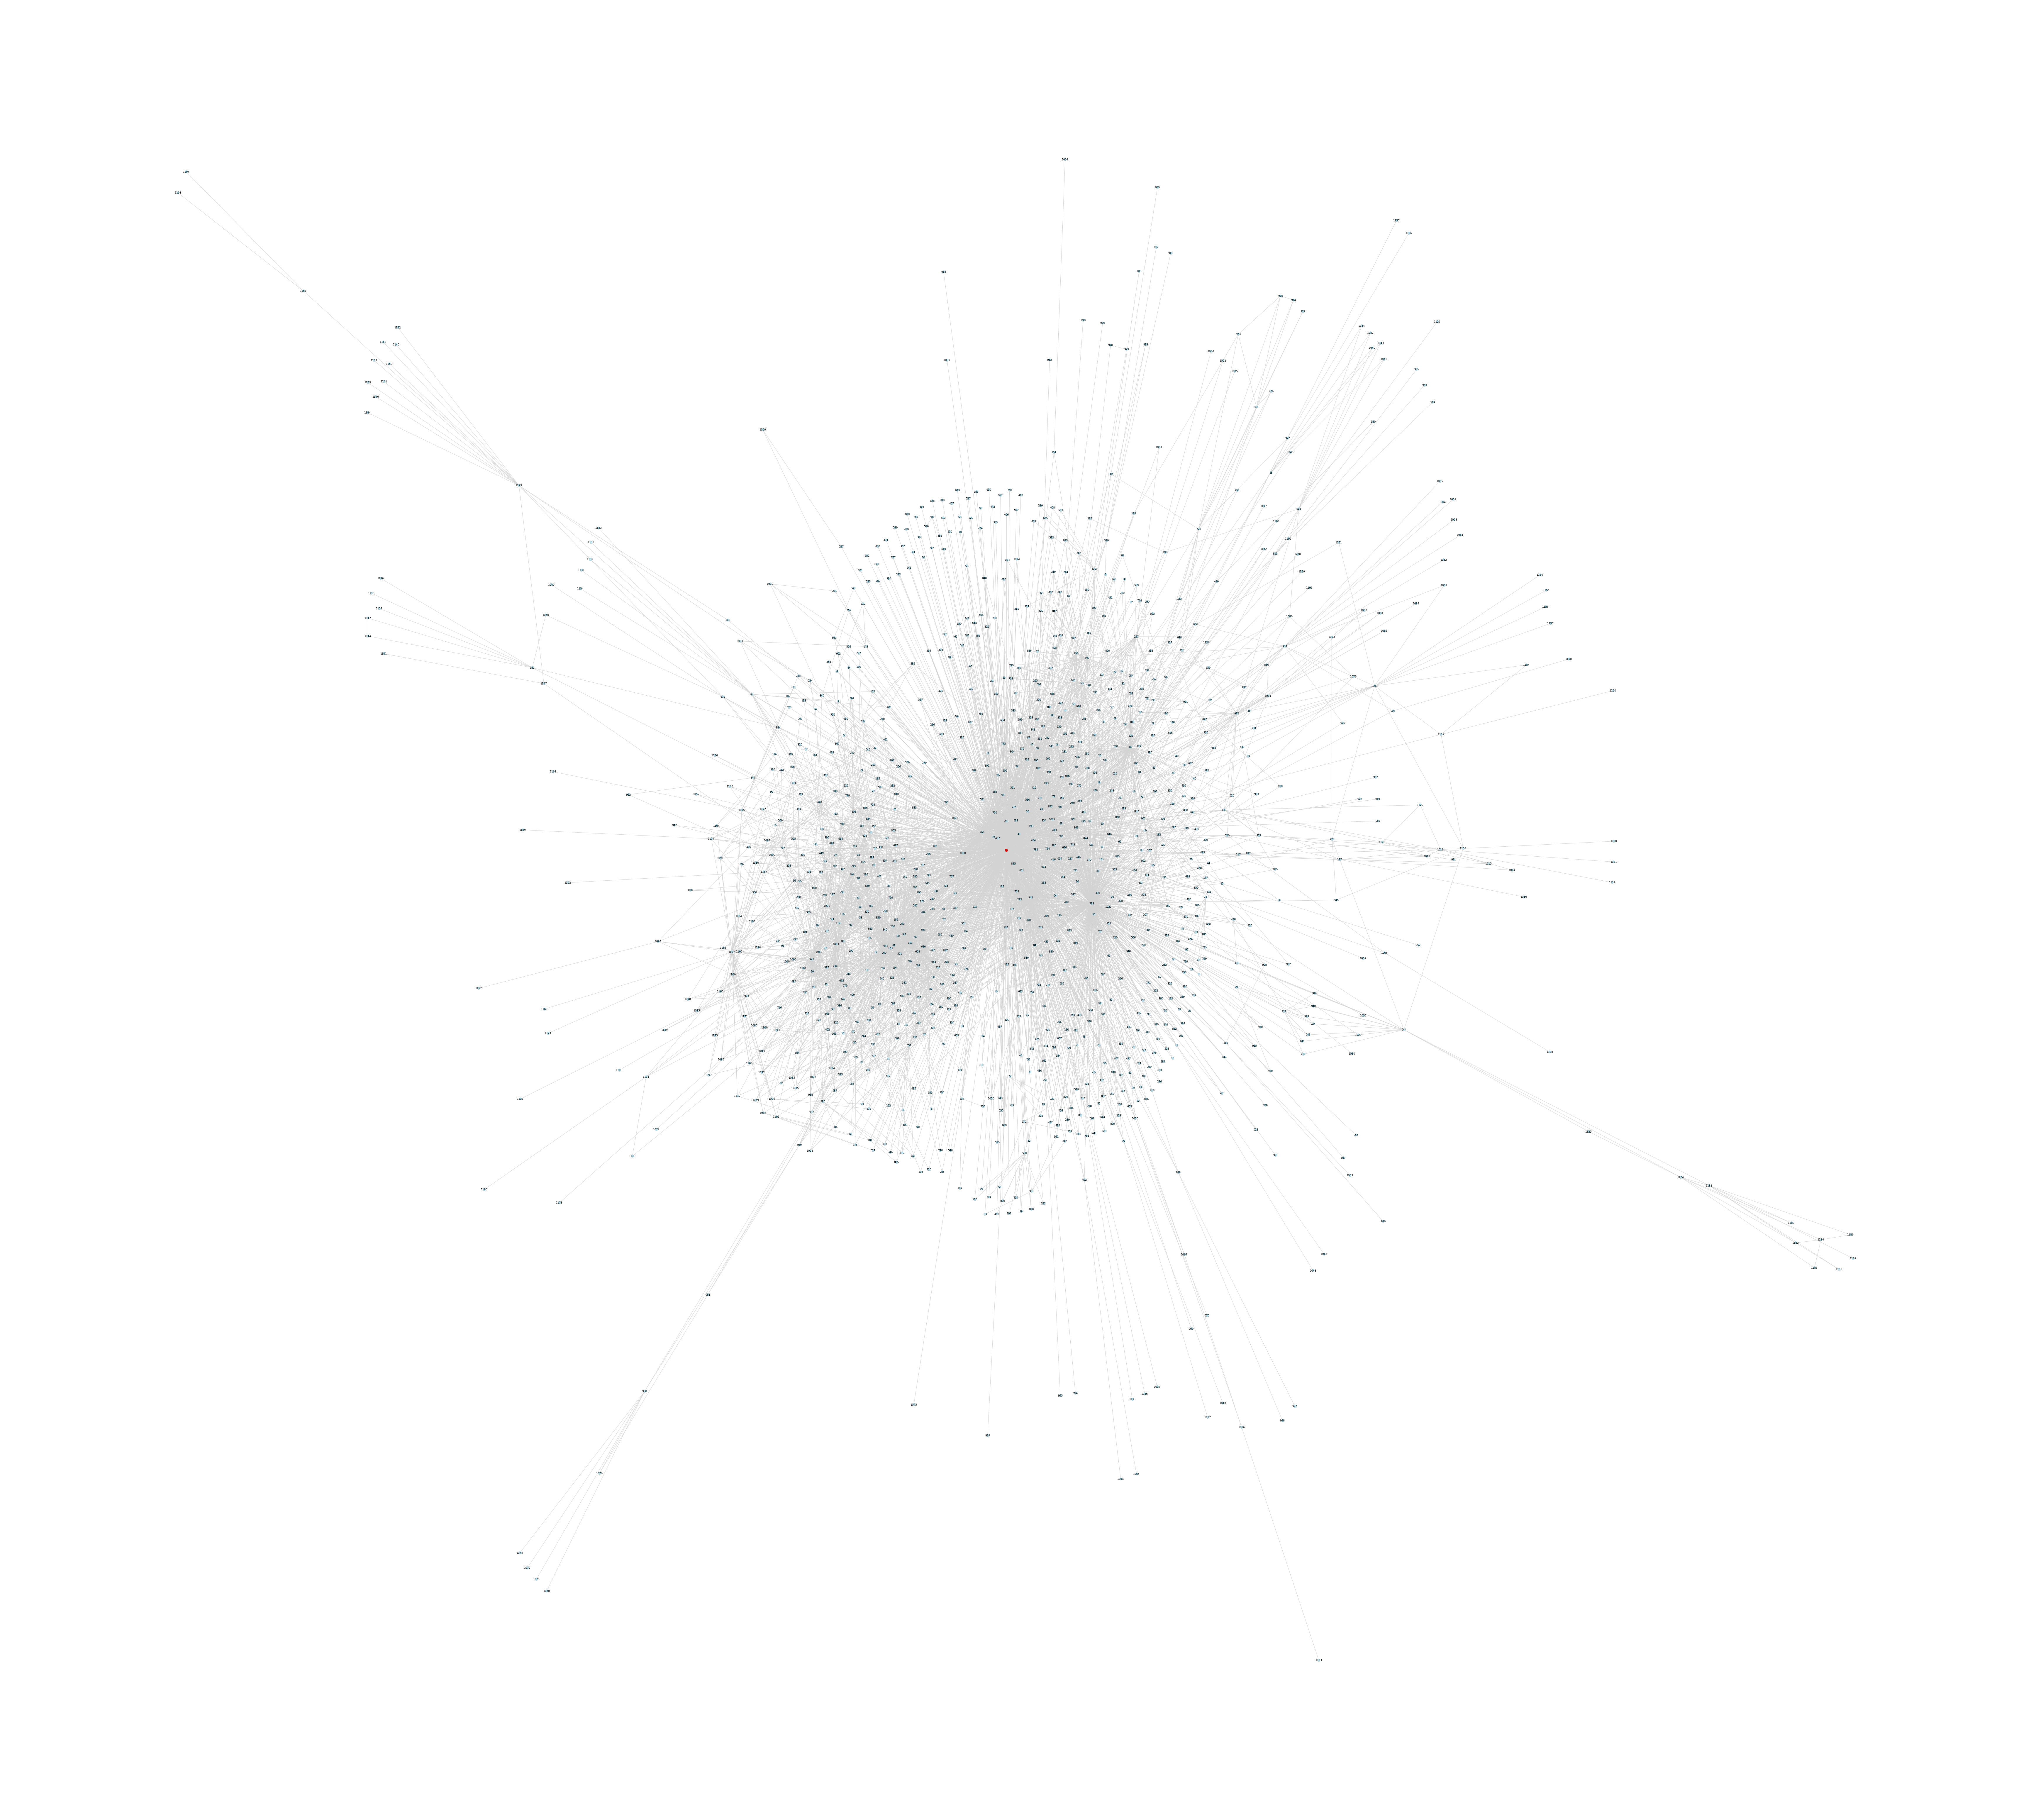

In [27]:
import networkx as nx
import matplotlib.pyplot as plt

plt.figure(figsize=(96, 86))

# dot, neato, fdp, sfdp, twopi, circo
g = nx.Graph()
g.add_edges_from(edge_list)
pos = nx.nx_pydot.graphviz_layout(g, prog='sfdp')
target_nodes = list(map(lambda x: name_to_node_id[x], targets))
node_colors = ['red' if n in target_nodes else 'lightblue' for n in g.nodes()]
nx.draw(g, with_labels=True, font_size=9, pos=pos, node_shape='.', node_color=node_colors, edge_color='lightgray')